In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf

In [3]:
x_data = np.linspace(0.0,10.0,1000000)

In [4]:
noise = np.random.randn(len(x_data))

In [5]:
noise

array([ 1.36458729, -0.20012971, -0.78724333, ...,  1.36131638,
        0.00737509,  0.86144045])

y = mx + b

b = 5


In [6]:
y_true = (0.5 * x_data) + 5 + noise

In [7]:
x_df = pd.DataFrame(data=x_data,columns=['X Data'])

In [8]:
y_df = pd.DataFrame(data=y_true,columns=['Y'])

In [9]:
y_df.head()

,Y
0,6.364587
1,4.799875
2,4.212767
3,3.953472
4,4.969866


In [10]:
my_data = pd.concat([x_df,y_df],axis=1)

In [11]:
my_data.head()

,X Data,Y
0,0.00000,6.364587
1,0.00001,4.799875
2,0.00002,4.212767
3,0.00003,3.953472
4,0.00004,4.969866


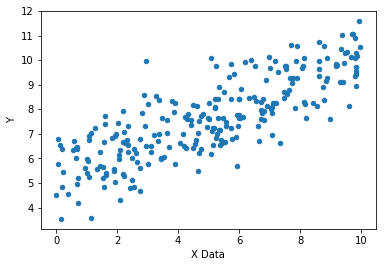

In [12]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')

In [13]:
batch_size = 8

In [14]:
np.random.randn(2)

array([-2.94683458,  0.43762721])

In [15]:
m = tf.Variable(1.39)
b = tf.Variable(0.43)

In [16]:
xph = tf.placeholder(tf.float32,[batch_size])

In [17]:
yph = tf.placeholder(tf.float32,[batch_size])

y = mx + b

b = 5

In [18]:
y_model = m*xph + b

In [19]:
error = tf.reduce_sum(tf.square(yph-y_model))

In [20]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [21]:
init = tf.global_variables_initializer()

In [22]:
with tf.Session() as sess:
    
    sess.run(init)
    
    batches = 10000
    
    for i in range(batches):
        
        rand_ind = np.random.randint(len(x_data),size=batch_size)
        
        feed = {xph:x_data[rand_ind],yph:y_true[rand_ind]}
        
        sess.run(train,feed_dict = feed)
        
    model_m , model_b = sess.run([m,b])
    

In [23]:
model_m

0.4241062

In [24]:
model_b

4.9822493

In [25]:
y_hat = x_data*model_m + model_b

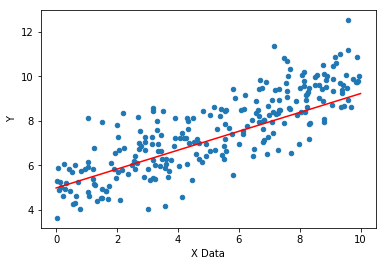

In [26]:
my_data.sample(250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(x_data,y_hat,'r')

# TF ESTIMATOR

In [27]:
feat_cols = [ tf.feature_column.numeric_column('x',shape=[1]) ] 

In [28]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_keep_checkpoint_max': 5, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001FF35AB4CF8>, '_is_chief': True, '_keep_checkpoint_every_n_hours': 10000, '_device_fn': None, '_evaluation_master': '', '_master': '', '_save_summary_steps': 100, '_task_id': 0, '_save_checkpoints_secs': 600, '_session_config': None, '_service': None, '_num_ps_replicas': 0, '_num_worker_replicas': 1, '_task_type': 'worker', '_log_step_count_steps': 100, '_train_distribute': None, '_tf_random_seed': None, '_save_checkpoints_steps': None, '_model_dir': 'C:\\Users\\ptdem\\AppData\\Local\\Temp\\tmp5alvnde5', '_global_id_in_cluster': 0}


In [32]:
from sklearn.model_selection import train_test_split

In [38]:
x_train, x_eval, y_train, y_eval = train_test_split(x_data,y_true,test_size=0.3,
                                         random_state=101)

In [39]:
print(x_train.shape)

(700000,)


In [40]:
x_eval.shape

(300000,)

In [41]:
input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=8,num_epochs=None,shuffle=True)

In [42]:
train_input_func =  tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=8,num_epochs=1000,shuffle=False)

In [43]:
eval_input_func =  tf.estimator.inputs.numpy_input_fn({'x':x_eval},y_eval,batch_size=8,num_epochs=1000,shuffle=False)

In [44]:
estimator.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\ptdem\AppData\Local\Temp\tmp5alvnde5\model.ckpt.
INFO:tensorflow:loss = 532.7324, step = 1
INFO:tensorflow:global_step/sec: 1044.13
INFO:tensorflow:loss = 41.477646, step = 101 (0.098 sec)
INFO:tensorflow:global_step/sec: 1559.56
INFO:tensorflow:loss = 33.77368, step = 201 (0.064 sec)
INFO:tensorflow:global_step/sec: 1519.2
INFO:tensorflow:loss = 8.300601, step = 301 (0.066 sec)
INFO:tensorflow:global_step/sec: 1566.69
INFO:tensorflow:loss = 9.302837, step = 401 (0.064 sec)
INFO:tensorflow:global_step/sec: 1496.52
INFO:tensorflow:loss = 10.21313, step = 501 (0.067 sec)
INFO:tensorflow:global_step/sec: 1496.52
INFO:tensorflow:loss = 13.110235, step = 601 (0.068 sec)
INFO:tensorflow:global_step/sec: 1

In [45]:
train_metrics = estimator.evaluate(input_fn=train_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2025-03-16-14:58:01
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\ptdem\AppData\Local\Temp\tmp5alvnde5\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2025-03-16-14:58:02
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.1272751, global_step = 1000, label/mean = 7.500547, loss = 9.018201, prediction/mean = 7.328991
INFO:tensorflow:Saving 'checkpoint_path' 

In [46]:
eval_metrics = estimator.evaluate(input_fn=eval_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2025-03-16-14:59:03
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\ptdem\AppData\Local\Temp\tmp5alvnde5\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2025-03-16-14:59:04
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0834209, global_step = 1000, label/mean = 7.4758706, loss = 8.667367, prediction/mean = 7.307726
INFO:tensorflow:Saving 'checkpoint_path'

In [47]:
print('TRAINING DATA METRICS')
print(train_metrics)

TRAINING DATA METRICS
{'loss': 9.018201, 'prediction/mean': 7.328991, 'global_step': 1000, 'average_loss': 1.1272751, 'label/mean': 7.500547}


In [48]:
print('EVAL METRICS')
print(eval_metrics)

EVAL METRICS
{'loss': 8.667367, 'prediction/mean': 7.307726, 'global_step': 1000, 'average_loss': 1.0834209, 'label/mean': 7.4758706}


In [49]:
brand_new_data = np.linspace(0,10,10)

In [51]:
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x':brand_new_data},shuffle=False)

In [53]:
list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\ptdem\AppData\Local\Temp\tmp5alvnde5\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.385382], dtype=float32)},
 {'predictions': array([5.039223], dtype=float32)},
 {'predictions': array([5.6930647], dtype=float32)},
 {'predictions': array([6.3469057], dtype=float32)},
 {'predictions': array([7.0007467], dtype=float32)},
 {'predictions': array([7.6545877], dtype=float32)},
 {'predictions': array([8.308429], dtype=float32)},
 {'predictions': array([8.96227], dtype=float32)},
 {'predictions': array([9.616112], dtype=float32)},
 {'predictions': array([10.269953], dtype=float32)}]

In [55]:
predictions = []

for pred in estimator.predict(input_fn=input_fn_predict):predictions.append(pred['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\ptdem\AppData\Local\Temp\tmp5alvnde5\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [56]:
predictions

[array([4.385382], dtype=float32),
 array([5.039223], dtype=float32),
 array([5.6930647], dtype=float32),
 array([6.3469057], dtype=float32),
 array([7.0007467], dtype=float32),
 array([7.6545877], dtype=float32),
 array([8.308429], dtype=float32),
 array([8.96227], dtype=float32),
 array([9.616112], dtype=float32),
 array([10.269953], dtype=float32)]

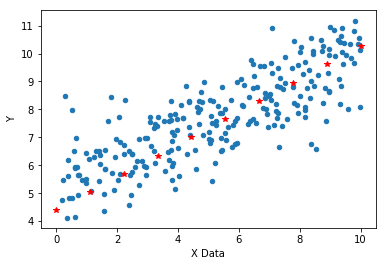

In [60]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(brand_new_data,predictions,'r*')